<a href="https://colab.research.google.com/github/lo-lim/SMWU/blob/main/Machine%20Learning%20with%20Python/MLatoz_csv%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) 데이터 범주화 및 정규화

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/MLatoz.csv', encoding='utf-8')

In [ ]:
display(data)

,연령,교육수준,직장근무년수,거주지거주년수,수입,대출_수입비율,신용카드대출금,기타대출금,상환불이행여부
0,41,3,17,12,176.0,9.3,11.36,5.01,1.0
1,27,1,10,6,31.0,17.3,1.36,4.00,0.0
2,40,1,15,14,55.0,5.5,0.86,2.17,0.0
3,41,1,15,14,120.0,2.9,2.66,0.82,0.0
4,24,2,2,0,28.0,17.3,1.79,3.06,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32.0,2.7,0.24,0.62,NaN
846,32,2,12,11,116.0,5.7,4.03,2.59,NaN
847,48,1,13,11,38.0,10.8,0.72,3.38,NaN
848,35,2,1,11,24.0,7.8,0.42,1.45,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연령       850 non-null    int64  
 1   교육수준     850 non-null    int64  
 2   직장근무년수   850 non-null    int64  
 3   거주지거주년수  850 non-null    int64  
 4   수입       850 non-null    float64
 5   대출_수입비율  850 non-null    float64
 6   신용카드대출금  850 non-null    float64
 7   기타대출금    850 non-null    float64
 8   상환불이행여부  700 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 59.9 KB


## 범주화 변수 원핫인코딩

In [ ]:
X1=data[['교육수준']]

In [ ]:
X2=data[['연령', '직장근무년수', '거주지거주년수', '수입', '대출_수입비율', '신용카드대출금', '기타대출금']]

In [ ]:
y=data[['상환불이행여부']]

In [ ]:
X1['교육수준'] = X1['교육수준'].replace([1,2,3,4], ['중졸', '고졸', '대학', '대학원'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
display(X1)

,교육수준
0,대학
1,중졸
2,중졸
3,중졸
4,고졸
...,...
845,중졸
846,고졸
847,중졸
848,고졸


In [ ]:
X1_dum=pd.get_dummies(X1) #원핫인코딩 실시

In [ ]:
X1_dum.head()

,교육수준_고졸,교육수준_대학,교육수준_대학원,교육수준_중졸
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0


## 연속형 변수의 스케일링(Min-Max)



In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler1=MinMaxScaler()

In [ ]:
scaler1.fit(X2)

MinMaxScaler()

In [ ]:
X_scaled1=scaler1.transform(X2)

## 데이터 통합하기

In [ ]:
X_scaled=pd.DataFrame(X_scaled1)

In [ ]:
display(X_scaled)

,0,1,2,3,4,5,6
0,0.583333,0.515152,0.352941,0.376443,0.223301,0.552311,0.141110
1,0.194444,0.303030,0.176471,0.041570,0.417476,0.065693,0.112376
2,0.555556,0.454545,0.411765,0.096998,0.131068,0.041363,0.060313
3,0.583333,0.454545,0.411765,0.247113,0.067961,0.128954,0.021906
4,0.111111,0.060606,0.000000,0.034642,0.417476,0.086618,0.085633
...,...,...,...,...,...,...,...
845,0.388889,0.363636,0.441176,0.043880,0.063107,0.011192,0.016216
846,0.333333,0.363636,0.323529,0.237875,0.135922,0.195620,0.072262
847,0.777778,0.393939,0.323529,0.057737,0.259709,0.034550,0.094737
848,0.416667,0.030303,0.323529,0.025404,0.186893,0.019951,0.039829


In [ ]:
X_scaled.columns=['연령', '직장근무년수', '거주지거주년수', '수입', '대출_수입비율', '신용카드대출금', '기타대출금']

In [ ]:
display(X_scaled)

,연령,직장근무년수,거주지거주년수,수입,대출_수입비율,신용카드대출금,기타대출금
0,0.583333,0.515152,0.352941,0.376443,0.223301,0.552311,0.141110
1,0.194444,0.303030,0.176471,0.041570,0.417476,0.065693,0.112376
2,0.555556,0.454545,0.411765,0.096998,0.131068,0.041363,0.060313
3,0.583333,0.454545,0.411765,0.247113,0.067961,0.128954,0.021906
4,0.111111,0.060606,0.000000,0.034642,0.417476,0.086618,0.085633
...,...,...,...,...,...,...,...
845,0.388889,0.363636,0.441176,0.043880,0.063107,0.011192,0.016216
846,0.333333,0.363636,0.323529,0.237875,0.135922,0.195620,0.072262
847,0.777778,0.393939,0.323529,0.057737,0.259709,0.034550,0.094737
848,0.416667,0.030303,0.323529,0.025404,0.186893,0.019951,0.039829


In [ ]:
mlatoz=pd.concat([X1_dum, X_scaled, y], axis=1)

In [ ]:
display(mlatoz)

,교육수준_고졸,교육수준_대학,교육수준_대학원,교육수준_중졸,연령,직장근무년수,거주지거주년수,수입,대출_수입비율,신용카드대출금,기타대출금,상환불이행여부
0,0,1,0,0,0.583333,0.515152,0.352941,0.376443,0.223301,0.552311,0.141110,1.0
1,0,0,0,1,0.194444,0.303030,0.176471,0.041570,0.417476,0.065693,0.112376,0.0
2,0,0,0,1,0.555556,0.454545,0.411765,0.096998,0.131068,0.041363,0.060313,0.0
3,0,0,0,1,0.583333,0.454545,0.411765,0.247113,0.067961,0.128954,0.021906,0.0
4,1,0,0,0,0.111111,0.060606,0.000000,0.034642,0.417476,0.086618,0.085633,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
845,0,0,0,1,0.388889,0.363636,0.441176,0.043880,0.063107,0.011192,0.016216,NaN
846,1,0,0,0,0.333333,0.363636,0.323529,0.237875,0.135922,0.195620,0.072262,NaN
847,0,0,0,1,0.777778,0.393939,0.323529,0.057737,0.259709,0.034550,0.094737,NaN
848,1,0,0,0,0.416667,0.030303,0.323529,0.025404,0.186893,0.019951,0.039829,NaN


# 2) 훈련용, 테스트용 데이터 구분

In [ ]:
X=mlatoz.loc[0:699, '교육수준_고졸':'기타대출금']

In [ ]:
y=mlatoz.loc[0:699, '상환불이행여부':]

In [ ]:
display(X)

,교육수준_고졸,교육수준_대학,교육수준_대학원,교육수준_중졸,연령,직장근무년수,거주지거주년수,수입,대출_수입비율,신용카드대출금,기타대출금
0,0,1,0,0,0.583333,0.515152,0.352941,0.376443,0.223301,0.552311,0.141110
1,0,0,0,1,0.194444,0.303030,0.176471,0.041570,0.417476,0.065693,0.112376
2,0,0,0,1,0.555556,0.454545,0.411765,0.096998,0.131068,0.041363,0.060313
3,0,0,0,1,0.583333,0.454545,0.411765,0.247113,0.067961,0.128954,0.021906
4,1,0,0,0,0.111111,0.060606,0.000000,0.034642,0.417476,0.086618,0.085633
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,0.444444,0.181818,0.441176,0.032333,0.109223,0.012165,0.026458
696,1,0,0,0,0.250000,0.181818,0.117647,0.018476,0.276699,0.017518,0.056899
697,0,0,0,1,0.361111,0.454545,0.088235,0.043880,0.182039,0.023358,0.053770
698,0,0,0,1,0.694444,0.575758,0.647059,0.147806,0.201456,0.111436,0.117212


In [ ]:
display(y)

,상환불이행여부
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
695,1.0
696,0.0
697,0.0
698,0.0


In [ ]:
X_new=mlatoz.loc[700:, '교육수준_고졸':'기타대출금']

In [ ]:
y_new=mlatoz.loc[700:, '상환불이행여부':]

In [ ]:
display(X_new)

,교육수준_고졸,교육수준_대학,교육수준_대학원,교육수준_중졸,연령,직장근무년수,거주지거주년수,수입,대출_수입비율,신용카드대출금,기타대출금
700,0,0,0,1,0.444444,0.484848,0.382353,0.043880,0.262136,0.025791,0.082219
701,0,0,0,1,0.833333,0.181818,0.794118,0.018476,0.310680,0.063747,0.038122
702,0,0,0,1,0.555556,0.272727,0.264706,0.046189,0.410194,0.236983,0.019346
703,0,0,0,1,0.305556,0.151515,0.205882,0.023095,0.046117,0.001946,0.010242
704,0,0,0,1,0.250000,0.121212,0.000000,0.025404,0.186893,0.041849,0.027312
...,...,...,...,...,...,...,...,...,...,...,...
845,0,0,0,1,0.388889,0.363636,0.441176,0.043880,0.063107,0.011192,0.016216
846,1,0,0,0,0.333333,0.363636,0.323529,0.237875,0.135922,0.195620,0.072262
847,0,0,0,1,0.777778,0.393939,0.323529,0.057737,0.259709,0.034550,0.094737
848,1,0,0,0,0.416667,0.030303,0.323529,0.025404,0.186893,0.019951,0.039829


In [ ]:
display(y_new)

,상환불이행여부
700,NaN
701,NaN
702,NaN
703,NaN
704,NaN
...,...
845,NaN
846,NaN
847,NaN
848,NaN


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42) 

# 3) KNN적용 및 최적의 K를 찾기

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 7}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.785


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.743


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005264,0.001675,0.006395,0.000747,1,{'n_neighbors': 1},0.761905,0.752381,0.695238,0.752381,...,0.740952,0.023637,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.004591,0.000149,0.006030,0.000487,2,{'n_neighbors': 2},0.771429,0.780952,0.742857,0.771429,...,0.765714,0.012919,6,0.838095,0.857143,0.854762,0.850000,0.854762,0.850952,0.006835
2,0.004721,0.000563,0.007355,0.001698,3,{'n_neighbors': 3},0.761905,0.752381,0.771429,0.790476,...,0.765714,0.014254,6,0.866667,0.878571,0.857143,0.892857,0.866667,0.872381,0.012289
3,0.006715,0.003818,0.006549,0.001243,4,{'n_neighbors': 4},0.752381,0.771429,0.733333,0.780952,...,0.754286,0.019425,9,0.823810,0.833333,0.835714,0.840476,0.830952,0.832857,0.005512
4,0.004891,0.000843,0.006154,0.000511,5,{'n_neighbors': 5},0.780952,0.761905,0.723810,0.771429,...,0.763810,0.021211,8,0.845238,0.838095,0.854762,0.850000,0.842857,0.846190,0.005754
5,0.005069,0.000278,0.006629,0.000329,6,{'n_neighbors': 6},0.790476,0.761905,0.752381,0.780952,...,0.775238,0.015474,4,0.821429,0.826190,0.833333,0.816667,0.826190,0.824762,0.005553
6,0.004892,0.000619,0.007467,0.001734,7,{'n_neighbors': 7},0.790476,0.780952,0.752381,0.790476,...,0.784762,0.018663,1,0.835714,0.845238,0.842857,0.847619,0.833333,0.840952,0.005512
7,0.005752,0.000745,0.008391,0.002574,8,{'n_neighbors': 8},0.761905,0.790476,0.752381,0.809524,...,0.784762,0.023790,1,0.821429,0.823810,0.826190,0.821429,0.814286,0.821429,0.003984
8,0.006395,0.003618,0.006666,0.000971,9,{'n_neighbors': 9},0.742857,0.790476,0.742857,0.819048,...,0.777143,0.029875,3,0.821429,0.823810,0.833333,0.830952,0.823810,0.826667,0.004617
9,0.008721,0.004002,0.013297,0.004884,10,{'n_neighbors': 10},0.752381,0.780952,0.733333,0.809524,...,0.773333,0.027205,5,0.811905,0.819048,0.802381,0.800000,0.811905,0.809048,0.006966


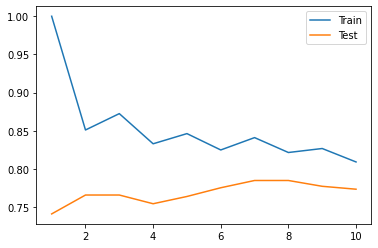

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

## Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa864667d90>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 7}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.785


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.743


In [ ]:
result_random = pd.DataFrame(random_search.cv_results_)

In [ ]:
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008687,0.001877,0.011384,0.001149,14,{'n_neighbors': 14},0.790476,0.761905,0.742857,0.800000,...,0.773333,0.020337,6,0.792857,0.802381,0.807143,0.792857,0.790476,0.797143,0.006459
1,0.008262,0.002700,0.015127,0.008196,19,{'n_neighbors': 19},0.790476,0.790476,0.733333,0.800000,...,0.779048,0.023637,4,0.797619,0.795238,0.802381,0.795238,0.792857,0.796667,0.003230
2,0.008652,0.001567,0.015040,0.004325,7,{'n_neighbors': 7},0.790476,0.780952,0.752381,0.790476,...,0.784762,0.018663,1,0.835714,0.845238,0.842857,0.847619,0.833333,0.840952,0.005512
3,0.012386,0.007813,0.016505,0.006692,18,{'n_neighbors': 18},0.752381,0.790476,0.733333,0.790476,...,0.769524,0.022857,7,0.792857,0.788095,0.809524,0.790476,0.780952,0.792381,0.009452
4,0.010580,0.006489,0.011302,0.001330,4,{'n_neighbors': 4},0.752381,0.771429,0.733333,0.780952,...,0.754286,0.019425,9,0.823810,0.833333,0.835714,0.840476,0.830952,0.832857,0.005512
5,0.010136,0.003673,0.016451,0.005844,19,{'n_neighbors': 19},0.790476,0.790476,0.733333,0.800000,...,0.779048,0.023637,4,0.797619,0.795238,0.802381,0.795238,0.792857,0.796667,0.003230
6,0.010478,0.005764,0.011502,0.001868,7,{'n_neighbors': 7},0.790476,0.780952,0.752381,0.790476,...,0.784762,0.018663,1,0.835714,0.845238,0.842857,0.847619,0.833333,0.840952,0.005512
7,0.012327,0.006083,0.013881,0.006958,18,{'n_neighbors': 18},0.752381,0.790476,0.733333,0.790476,...,0.769524,0.022857,7,0.792857,0.788095,0.809524,0.790476,0.780952,0.792381,0.009452
8,0.009180,0.004480,0.012142,0.005470,1,{'n_neighbors': 1},0.761905,0.752381,0.695238,0.752381,...,0.740952,0.023637,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.011249,0.005676,0.014566,0.003586,7,{'n_neighbors': 7},0.790476,0.780952,0.752381,0.790476,...,0.784762,0.018663,1,0.835714,0.845238,0.842857,0.847619,0.833333,0.840952,0.005512


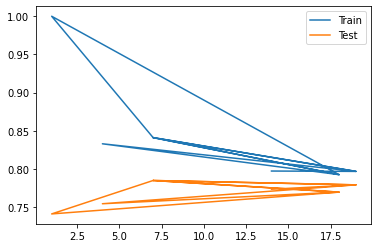

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

최적의 k는 Grid/Random Search를 통해 '7'을 도출

##기존 수업 때 했던 흐름

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)  #최적의 k는 '7'

In [ ]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
pred_train=knn.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_train=confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)  

훈련데이터 오차행렬:
 [[366  22]
 [ 59  78]]


In [ ]:
pred_test=knn.predict(X_test)

In [ ]:
confusion_test=confusion_matrix(y_test, pred_test)

In [ ]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[115  14]
 [ 31  15]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1=f1_score(y_train, pred_train)

In [ ]:
print("f1 score:\n", f1)

f1 score:
 0.6582278481012658


In [ ]:
f1=f1_score(y_test, pred_test)

In [ ]:
print("f1 score:\n", f1)

f1 score:
 0.4


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       129
         1.0       0.52      0.33      0.40        46

    accuracy                           0.74       175
   macro avg       0.65      0.61      0.62       175
weighted avg       0.72      0.74      0.72       175



## 신규데이터 이용

In [ ]:
pred_train=knn.predict(X_new)

In [ ]:
pred_train # 종속변수가 없는 나머지 행들의 예측값들(생성한 머신러닝 모델을 이용)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.])